## Adding "levels" to a Tree

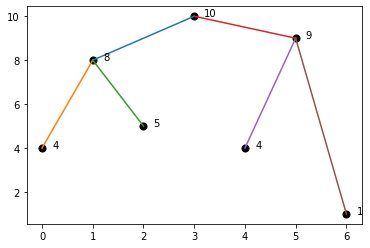

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt


from interleaving_FPT import *
import binarytrees as bt


# Build tree
root = bt.TreeNode(key=10)
root.left = bt.TreeNode(key=8)
root.left.left = bt.TreeNode(key=4)
root.left.right = bt.TreeNode(key=5)
root.right = bt.TreeNode(key=9)
root.right.left = bt.TreeNode(key=4)
root.right.right = bt.TreeNode(key=1)

treeA = bt.BinaryTree()
treeA.root = root

# Visualize
treeA.draw()



We now call `get_criticalheights()` on the tree to add tree nodes at each level (as dubbed in the paper), i.e., along the "horitzonal lines."


{4: [<binarytrees.TreeNode object at 0x10752be20>, <binarytrees.TreeNode object at 0x10cd56560>, <binarytrees.TreeNode object at 0x10752be20>, <binarytrees.TreeNode object at 0x10cd56560>, <binarytrees.TreeNode object at 0x10ce36ef0>], 8: [<binarytrees.TreeNode object at 0x10752b820>, <binarytrees.TreeNode object at 0x10752b820>, <binarytrees.TreeNode object at 0x1068eb5e0>, <binarytrees.TreeNode object at 0x10ce76350>], 5: [<binarytrees.TreeNode object at 0x10752b5b0>, <binarytrees.TreeNode object at 0x10ce76410>, <binarytrees.TreeNode object at 0x10752b5b0>, <binarytrees.TreeNode object at 0x10ce762f0>, <binarytrees.TreeNode object at 0x10ce77910>], 10: [<binarytrees.TreeNode object at 0x10c76cdf0>, <binarytrees.TreeNode object at 0x10c76cdf0>], 9: [<binarytrees.TreeNode object at 0x10cd55db0>, <binarytrees.TreeNode object at 0x10ce773a0>, <binarytrees.TreeNode object at 0x10cd55db0>], 1: [<binarytrees.TreeNode object at 0x10cd56050>, <binarytrees.TreeNode object at 0x10cd56050>]}


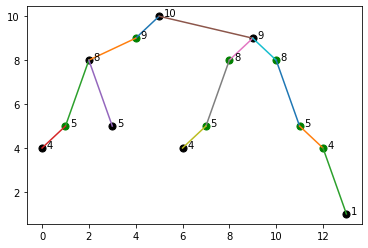

In [2]:
heights = get_criticalheights(treeA)
print(heights)

treeA.draw()

We now build a second tree:

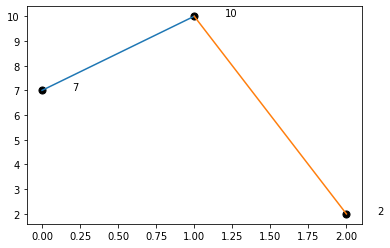

In [3]:
root2 = bt.TreeNode(key=10)
root2.left = bt.TreeNode(key=7)
root2.right = bt.TreeNode(key=2)

tree2 = bt.BinaryTree()
tree2.root = root2

tree2.draw()


Finally, we can perform the full augmentation, adding all nodes from the "super levels" of both trees:

True
height 1: 4
height 1: 8
height 1: 5
height 1: 10
height 1: 9
height 1: 1
height 1: 7
height 1: 2
height 2: 4
height 2: 8
height 2: 5
height 2: 10
height 2: 9
height 2: 1
height 2: 7
height 2: 2


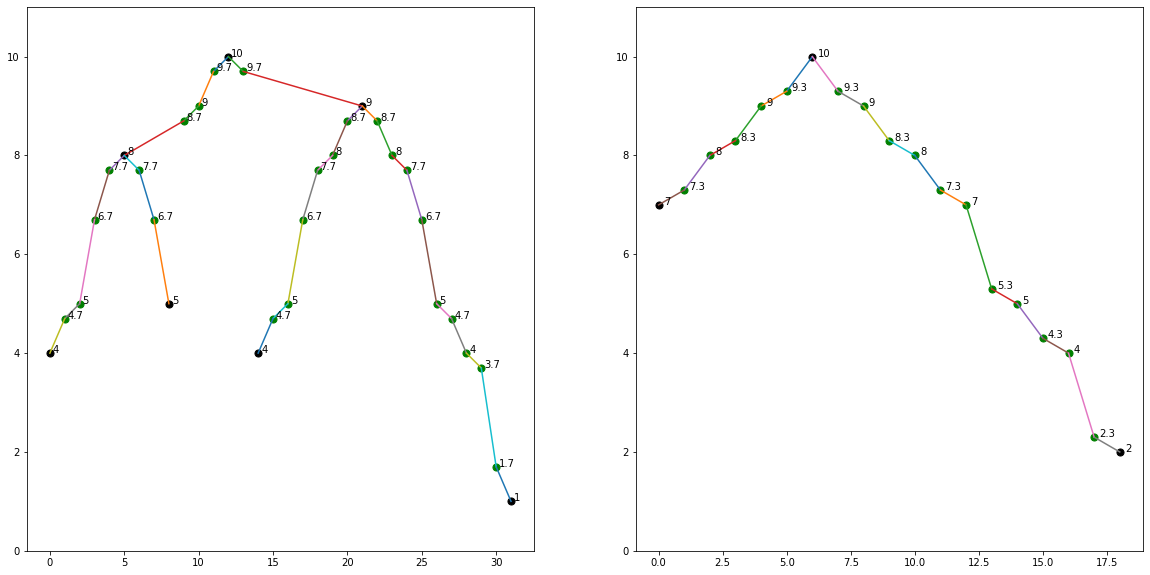

In [4]:
augment_trees(treeA, tree2, delta=0.3)

plt.figure(figsize=(20,10))

plt.subplot(121)
plt.ylim((0,11))
treeA.draw()

plt.subplot(122)
plt.ylim((0,11))
tree2.draw()